In [1]:
#For the math to show up in-line
%matplotlib inline

/Users/samanthausman/zerk/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Imports

#For accessing URL
import urllib2

#For scraping the websites
from bs4 import BeautifulSoup

#For making the plots
import pylab as plt
import numpy

In [3]:
#Getting names of all the compeititons and their IBJJF Database index number
#These numbers are saved in the .txt included in the GitHub repo.
#This is the slowest part of the code, so you can refer to the .txt file and comment this section out (set it as RawNBConvert in drop down menu above).
#Counter for IBJJF databases
counter = 0.00
while counter < 15.00:
    counter += 0.01
    try:
        #Accessing IBJJF Database
        page = urllib2.urlopen("http://www.ibjjfdb.com/ChampionshipResults/%s/PublicRegistrations?lang=en-US"%int(counter*100))
    except urllib2.HTTPError:
        #Checking for 404 or Internal Server Error
        continue
    
    #Reading page
    soup = BeautifulSoup(page,'html.parser')
    
    #Finding competition title
    comp_name = soup.findAll("h2")
    
    #Printing list of indices and their associated competition
    print int(counter*100), comp_name

150 [<h2>Long Beach Fall International Open 2012</h2>]
154 [<h2>European Open Jiu-Jitsu Championship 2013</h2>]
155 [<h2>IBJJ Pro-League 2012</h2>]
156 [<h2>Pan Kids Jiu-Jitsu Championship 2013</h2>]
157 [<h2>Houston International Open 2013</h2>]
158 [<h2>San Francisco International Open 2013</h2>]
159 [<h2>Boston Winter International Open 2013</h2>]
160 [<h2>Chicago Winter International Open 2013</h2>]
161 [<h2>Chicago Winter International Open NO GI 2013</h2>]
162 [<h2>Pan Jiu-Jitsu Championship 2013</h2>]
173 [<h2>New York International Open 2013</h2>]
174 [<h2>Las Vegas Spring International Open 2013</h2>]
175 [<h2>Rules Seminar - PAN 2013</h2>]
176 [<h2>Dallas Open International 2013</h2>]
177 [<h2>World Jiu-Jitsu Championship 2013</h2>]
178 [<h2>Rio International Open IBJJF Jiu-Jitsu Championship 2013</h2>]
179 [<h2>International Master &amp; Senior IBJJF Jiu-Jitsu Championship 2013</h2>]
180 [<h2>Rome International Open 2013</h2>]
181 [<h2>European Open No-Gi Jiu-Jitsu Champions

In [50]:
#Manually created list of Worlds competitions
worlds_adult = [177, 272, 415, 535, 730, 926]

#Empty arrays to be filled with data for each year
worlds_adult_totals = [0]*len(worlds_adult)
worlds_adult_white = [0]*len(worlds_adult)
worlds_adult_blue = [0]*len(worlds_adult)
worlds_adult_purple = [0]*len(worlds_adult)
worlds_adult_brown = [0]*len(worlds_adult)
worlds_adult_black = [0]*len(worlds_adult)
worlds_female = [0]*len(worlds_adult)
worlds_male = [0]*len(worlds_adult)
worlds_adults = [0]*len(worlds_adult)
worlds_masters = [0]*len(worlds_adult)

#Years of Worlds Comps
years = [2013, 2014, 2015, 2016, 2017, 2018]

#Looping through each competition
for i,comp in enumerate(worlds_adult):
    print i,
    
    #Accessing Worlds data
    page = urllib2.urlopen("http://www.ibjjfdb.com/ChampionshipResults/%d/PublicRegistrations?lang=en-US"%comp)

    #Getting data from competition page
    soup = BeautifulSoup(page,'html.parser')
    
    #Segregate data by rows
    rows = soup.findAll('div',{'class':'row'})

    #Create empty lists
    divisions = []
    competitors = []

    #Create and append respective lists with a loop
    for row in rows:
        raw_division = row.h4.text
        division = raw_division.split(' / ')
        divisions.append(division)

        raw_competitors = row.tfoot.tr.td.text.strip()
        competitor = raw_competitors.replace('Total: ','')
        competitors.append(competitor)
    
    #'divisions' array has all competitions and their belt, age, gender and weight
    competitors = map(int, competitors)
    
    #All belt colors
    belt_divisions = numpy.unique(numpy.transpose(divisions)[0])
    
    #All age divisions
    age_divisions = numpy.unique(numpy.transpose(divisions)[1])
    
    #All gender divisions
    gender_divisions = numpy.unique(numpy.transpose(divisions)[2])
    
    #All weight classes
    weight_classes = numpy.unique(numpy.transpose(divisions)[3])
    
    
    #This array has the indices of all divisions which aren't open class
    exclude_absolute = numpy.where("Open Class" != numpy.transpose(divisions)[3])

    #This array has the indices of all divisions excluding Juvenile 1
    exclude_juvenile1 = numpy.where("Juvenile 1" != numpy.transpose(divisions)[1])
    
    #This array has the indices of all divisions excluding Juvenile 2
    exclude_juvenile2 = numpy.where("Juvenile 2" != numpy.transpose(divisions)[1])
    
    #This array has the indices of all divisions excluding Juvenile
    exclude_juvenile = numpy.where("Juvenile" != numpy.transpose(divisions)[1])
    
    #This array has the indices of all divisions excluding white belts
    exclude_white = numpy.where("WHITE" != numpy.transpose(divisions)[0])
    
    
    #Comment this out if you'd like to include absolute divisions
    #(but I think that commenting it out will make you double-count competitors)
    mask = exclude_absolute[0]
    
    #Comment this out if you'd like to include Juvenile 1
    mask = numpy.intersect1d(mask, exclude_juvenile1)
    
    #Comment this out if you'd like to include Juvenile 2
    mask = numpy.intersect1d(mask, exclude_juvenile2)
  
    #Comment this out if you'd like to include white belts
    #mask = numpy.intersect1d(mask, exclude_white)
    
    
    #This array includes only female divisions
    only_women = numpy.intersect1d(mask, numpy.where("Female" == numpy.transpose(divisions)[2]))
    #This array includes only male divisions
    only_men = numpy.intersect1d(mask, numpy.where("Male" == numpy.transpose(divisions)[2]))
    
    #This array includes only white belt divisions
    only_white = numpy.intersect1d(mask, numpy.where("WHITE" == numpy.transpose(divisions)[0]))
    #This array includes only blue belt divisions
    only_blue = numpy.intersect1d(mask, numpy.where("BLUE" == numpy.transpose(divisions)[0]))
    #This array includes only purple belt divisions
    only_purple = numpy.intersect1d(mask, numpy.where("PURPLE" == numpy.transpose(divisions)[0]))
    #This array includes only brown belt divisions
    only_brown = numpy.intersect1d(mask, numpy.where("BROWN" == numpy.transpose(divisions)[0]))
    #This array includes only black belt divisions
    only_black = numpy.intersect1d(mask, numpy.where("BLACK" == numpy.transpose(divisions)[0]))
    
    #This array includes only masters (when juveniles are excluded)
    only_master = numpy.intersect1d(mask, numpy.where("Adult" != numpy.transpose(divisions)[1]))
    #This array includes only adults
    only_adult = numpy.intersect1d(mask, numpy.where("Adult" == numpy.transpose(divisions)[1]))
    
    #Totaling up white belt competitors
    for x in only_master:
        worlds_masters[i] += competitors[x]
        
    #Totaling up white belt competitors
    for x in only_adult:
        worlds_adults[i] += competitors[x]
        
    #Totaling up white belt competitors
    for x in only_white:
        worlds_adult_white[i] += competitors[x]
    
    #Totaling up blue belt competitors
    for x in only_blue:
        worlds_adult_blue[i] += competitors[x]
    
    #Totaling up purple belt competitors
    for x in only_purple:
        worlds_adult_purple[i] += competitors[x]
    
    #Totaling up brown belt competitors
    for x in only_brown:
        worlds_adult_brown[i] += competitors[x]
        
    #Totaling up black belt competitors
    for x in only_black:
        worlds_adult_black[i] += competitors[x]
    
    #Totaling all competitors
    for x in mask:
        worlds_adult_totals[i] += competitors[x]
     
    #Totaling female competitors
    for x in only_women:
        worlds_female[i] += competitors[x]
    
    #Totaling male competitors
    for x in only_men:
        worlds_male[i] += competitors[x]

 0 1 2 3 4 5


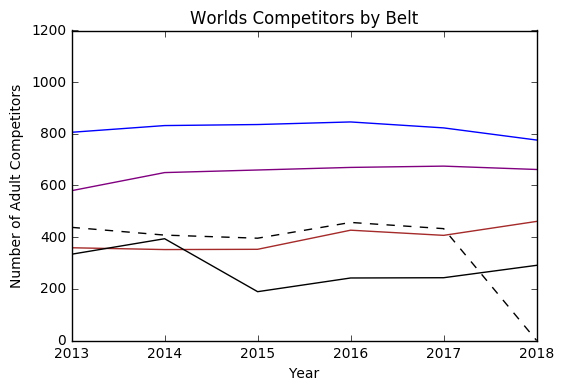

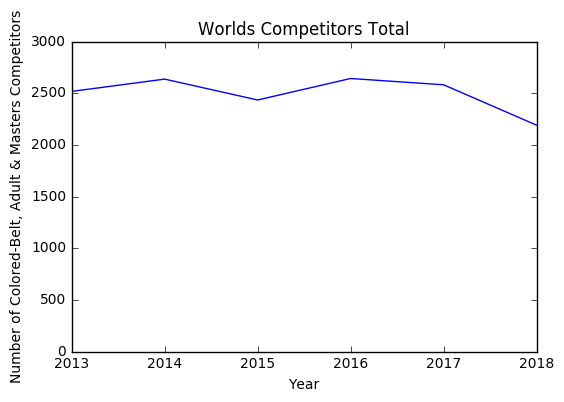

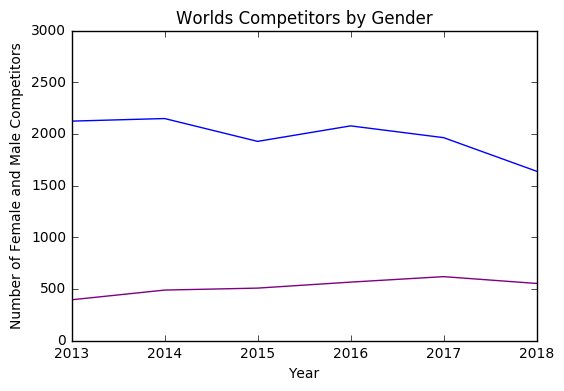

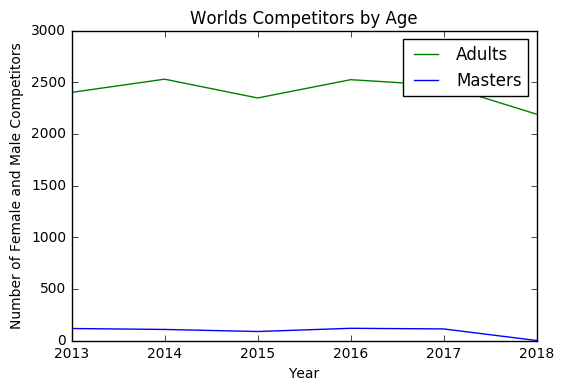

In [51]:
#Array for x-axis labels. I could probably use str(years) or something instead
labels = ["2013","2014","2015","2016","2017","2018"]

#Making plot for competitors by belt
plt.clf()
plt.title("Worlds Competitors by Belt")
plt.plot(years, worlds_adult_white, c="black", linestyle="dashed")
plt.plot(years, worlds_adult_blue, c="blue")
plt.plot(years, worlds_adult_purple, c="purple")
plt.plot(years, worlds_adult_brown, c="brown")
plt.plot(years, worlds_adult_black, c="black")
plt.xlabel("Year")
plt.ylabel("Number of Adult Competitors")
plt.ylim(0,1200)
plt.xticks(years, labels)
plt.show()

#Making plot for total competitors
plt.clf()
plt.title("Worlds Competitors Total")
plt.plot(years, worlds_adult_totals)
plt.xlabel("Year")
plt.xticks(years, labels)
plt.ylim(0,3000)
plt.ylabel("Number of Colored-Belt, Adult & Masters Competitors")
plt.show()

#Making plot for female vs male competitors
plt.clf()
plt.title("Worlds Competitors by Gender")
plt.plot(years, worlds_female, c="purple")
plt.plot(years, worlds_male, c="blue")
plt.xlabel("Year")
plt.xticks(years, labels)
plt.ylim(0,3000)
plt.ylabel("Number of Female and Male Competitors")
plt.show()

#Making plot for female vs male competitors
plt.clf()
plt.title("Worlds Competitors by Age")
plt.plot(years, worlds_adults, c="green", label="Adults")
plt.plot(years, worlds_masters, c="blue", label="Masters")
plt.legend()
plt.xlabel("Year")
plt.xticks(years, labels)
plt.ylim(0,3000)
plt.ylabel("Number of Female and Male Competitors")
plt.show()

In [21]:
worlds_master = [211, 318, 450, 572, 726, 895]

worlds_master_totals = [0]*len(worlds_master)
worlds_master_white = [0]*len(worlds_master)
worlds_master_blue = [0]*len(worlds_master)
worlds_master_purple = [0]*len(worlds_master)
worlds_master_brown = [0]*len(worlds_master)
worlds_master_black = [0]*len(worlds_master)
worlds_master_female = [0]*len(worlds_master)
worlds_master_male = [0]*len(worlds_master)

years = [2013, 2014, 2015, 2016, 2017, 2018]

for i,comp in enumerate(worlds_master):
    page = urllib2.urlopen("http://www.ibjjfdb.com/ChampionshipResults/%d/PublicRegistrations?lang=en-US"%comp)

    soup = BeautifulSoup(page,'html.parser')
    rows = soup.findAll('div',{'class':'row'})

    divisions = []
    competitors = []

    for row in rows:
        raw_division = row.h4.text
        division = raw_division.split(' / ')
        divisions.append(division)

        raw_competitors = row.tfoot.tr.td.text.strip()
        competitor = raw_competitors.replace('Total: ','')
        competitors.append(competitor)
        
    competitors = map(int, competitors)
    belt_divisions = numpy.unique(numpy.transpose(divisions)[0])
    age_divisions = numpy.unique(numpy.transpose(divisions)[1])
    gender_divisions = numpy.unique(numpy.transpose(divisions)[2])
    weight_classes = numpy.unique(numpy.transpose(divisions)[3])
    
    exclude_absolute = numpy.where("Open Class" != numpy.transpose(divisions)[3])
    exclude_juvenile1 = numpy.where("Juvenile 1" != numpy.transpose(divisions)[1])
    exclude_juvenile2 = numpy.where("Juvenile 2" != numpy.transpose(divisions)[1])
    exclude_juvenile = numpy.where("Juvenile" != numpy.transpose(divisions)[1])
    exclude_white = numpy.where("WHITE" != numpy.transpose(divisions)[0])
    
    #Comment this out if you'd like to include absolute divisions
    #(but I think that commenting it out will make you double-count competitors)
    mask = exclude_absolute[0]
    
    #Comment this out if you'd like to include Juvenile 1
    mask = numpy.intersect1d(mask,exclude_juvenile1)
    
    #Comment this out if you'd like to include Juvenile 2
    mask = numpy.intersect1d(mask, exclude_juvenile2)
  
    #Comment this out if you'd like to include white belts
    mask = numpy.intersect1d(mask, exclude_white)
    
    only_women = numpy.intersect1d(mask, numpy.where("Female" == numpy.transpose(divisions)[2]))
    only_men = numpy.intersect1d(mask, numpy.where("Male" == numpy.transpose(divisions)[2]))
    
    only_white = numpy.intersect1d(mask, numpy.where("WHITE" == numpy.transpose(divisions)[0]))
    only_blue = numpy.intersect1d(mask, numpy.where("BLUE" == numpy.transpose(divisions)[0]))
    only_purple = numpy.intersect1d(mask, numpy.where("PURPLE" == numpy.transpose(divisions)[0]))
    only_brown = numpy.intersect1d(mask, numpy.where("BROWN" == numpy.transpose(divisions)[0]))
    only_black = numpy.intersect1d(mask, numpy.where("BLACK" == numpy.transpose(divisions)[0]))
    
    for x in only_white:
        worlds_master_white[i] += competitors[x]
        
    for x in only_blue:
        worlds_master_blue[i] += competitors[x]
    
    for x in only_purple:
        worlds_master_purple[i] += competitors[x]
        
    for x in only_brown:
        worlds_master_brown[i] += competitors[x]
        
    for x in only_black:
        worlds_master_black[i] += competitors[x]
    
    for x in mask:
        worlds_master_totals[i] += competitors[x]
        
    for x in only_women:
        worlds_master_female[i] += competitors[x]
        
    for x in only_men:
        worlds_master_male[i] += competitors[x]

SyntaxError: invalid syntax (<ipython-input-21-b3d33e19a2f4>, line 58)

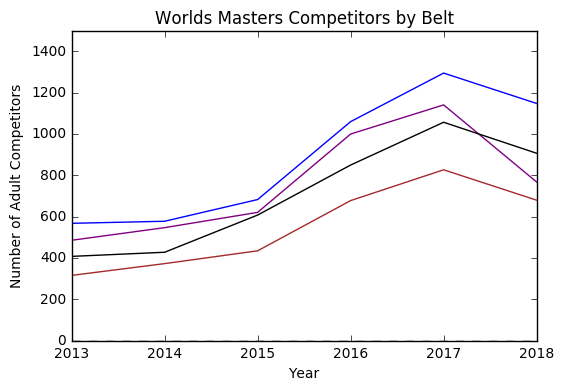

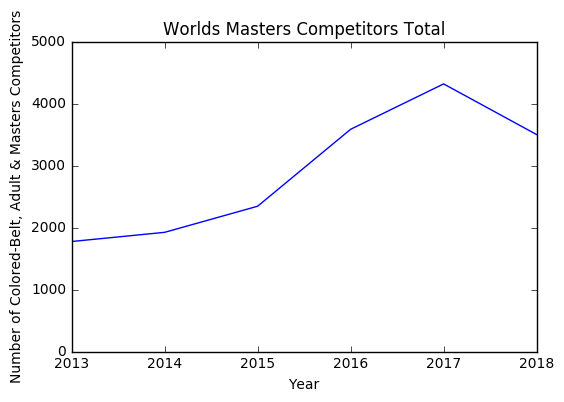

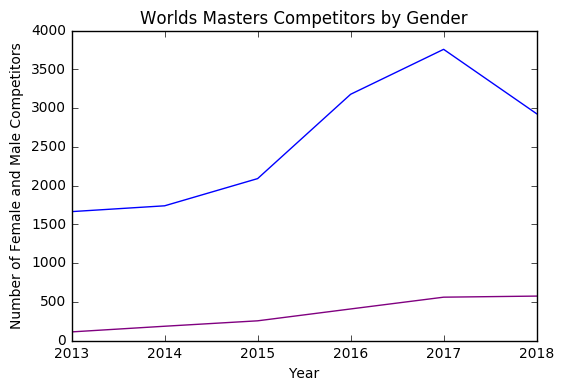

In [20]:
labels = ["2013","2014","2015","2016","2017","2018"]

plt.clf()
plt.title("Worlds Masters Competitors by Belt")
plt.plot(years, worlds_master_white, c="black", linestyle="dashed")
plt.plot(years, worlds_master_blue, c="blue")
plt.plot(years, worlds_master_purple, c="purple")
plt.plot(years, worlds_master_brown, c="brown")
plt.plot(years, worlds_master_black, c="black")
plt.xlabel("Year")
plt.ylabel("Number of Adult Competitors")
plt.ylim(0,1500)
plt.xticks(years, labels)
plt.show()

plt.clf()
plt.title("Worlds Masters Competitors Total")
plt.plot(years, worlds_master_totals)
plt.xlabel("Year")
plt.xticks(years, labels)
plt.ylim(0,5000)
plt.ylabel("Number of Colored-Belt, Adult & Masters Competitors")
plt.show()

plt.clf()
plt.title("Worlds Masters Competitors by Gender")
plt.plot(years, worlds_master_female, c="purple")
plt.plot(years, worlds_master_male, c="blue")
plt.xlabel("Year")
plt.xticks(years, labels)
plt.ylim(0,4000)
plt.ylabel("Number of Female and Male Competitors")
plt.show()

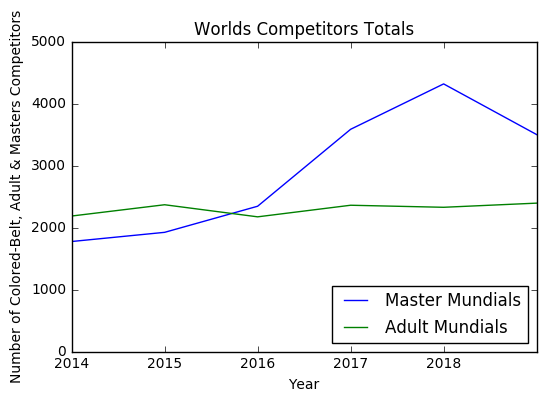

In [19]:
plt.clf()
plt.title("Worlds Competitors Totals")
plt.plot(years, worlds_master_totals, label="Master Mundials")
plt.plot(years, worlds_adult_totals, label="Adult Mundials")
plt.xlabel("Year")
plt.xticks(years, labels)
plt.ylim(0,5000)
plt.ylabel("Number of Colored-Belt, Adult & Masters Competitors")
plt.legend(loc = 4)
plt.show()

In [9]:
divisions_pans = []
competitors_pans = []

pans = [162, 241, 358, 516, 671, 867]

pans_totals = [0]*len(pans)
pans_white = [0]*len(pans)
pans_blue = [0]*len(pans)
pans_purple = [0]*len(pans)
pans_brown = [0]*len(pans)
pans_black = [0]*len(pans)
pans_female = [0]*len(pans)
pans_male = [0]*len(pans)

years = [2013, 2014, 2015, 2016, 2017, 2018]

for i,comp in enumerate(pans):
    page = urllib2.urlopen("http://www.ibjjfdb.com/ChampionshipResults/%d/PublicRegistrations?lang=en-US"%comp)

    soup = BeautifulSoup(page,'html.parser')
    #Segregate data by rows
    rows = soup.findAll('div',{'class':'row'})

    #Create empty lists
    divisions = []
    competitors = []

    #Create and append respective lists with a loop
    for row in rows:
        raw_division = row.h4.text
        division = raw_division.split(' / ')
        divisions.append(division)

        raw_competitors = row.tfoot.tr.td.text.strip()
        competitor = raw_competitors.replace('Total: ','')
        competitors.append(competitor)
        
    competitors = map(int, competitors)
    belt_divisions = numpy.unique(numpy.transpose(divisions)[0])
    age_divisions = numpy.unique(numpy.transpose(divisions)[1])
    gender_divisions = numpy.unique(numpy.transpose(divisions)[2])
    weight_classes = numpy.unique(numpy.transpose(divisions)[3])
    
    exclude_absolute = numpy.where("Open Class" != numpy.transpose(divisions)[3])
    exclude_white = numpy.where("WHITE" != numpy.transpose(divisions)[0])
    exclude_juvenile1 = numpy.where("Juvenile 1" != numpy.transpose(divisions)[1])
    exclude_juvenile2 = numpy.where("Juvenile 2" != numpy.transpose(divisions)[1])
    exclude_juvenile = numpy.where("Juvenile" != numpy.transpose(divisions)[1])
    
    #Comment this out if you'd like to include absolute divisions
    #(but I think that commenting it out will make you double-count competitors)
    mask = exclude_absolute[0]
    
    #Comment this out if you'd like to include Juvenile 1
    mask = numpy.intersect1d(mask,exclude_juvenile1)
    
    #Comment this out if you'd like to include Juvenile 2
    mask = numpy.intersect1d(mask, exclude_juvenile2)
  
    #Comment this out if you'd like to include white belts
    mask = numpy.intersect1d(mask, exclude_white)
    
    only_women = numpy.intersect1d(mask, numpy.where("Female" == numpy.transpose(divisions)[2]))
    only_men = numpy.intersect1d(mask, numpy.where("Male" == numpy.transpose(divisions)[2]))
    
    only_white = numpy.intersect1d(mask, numpy.where("WHITE" == numpy.transpose(divisions)[0]))
    only_blue = numpy.intersect1d(mask, numpy.where("BLUE" == numpy.transpose(divisions)[0]))
    only_purple = numpy.intersect1d(mask, numpy.where("PURPLE" == numpy.transpose(divisions)[0]))
    only_brown = numpy.intersect1d(mask, numpy.where("BROWN" == numpy.transpose(divisions)[0]))
    only_black = numpy.intersect1d(mask, numpy.where("BLACK" == numpy.transpose(divisions)[0]))
    
    print i,
    
    for x in only_white:
        pans_white[i] += competitors[x]
    
    for x in only_blue:
        pans_blue[i] += competitors[x]
    
    for x in only_purple:
        pans_purple[i] += competitors[x]
        
    for x in only_brown:
        pans_brown[i] += competitors[x]
        
    for x in only_black:
        pans_black[i] += competitors[x]
    
    for x in mask:
        pans_totals[i] += competitors[x]
        
    for x in only_women:
        pans_female[i] += competitors[x]
        
    for x in only_men:
        pans_male[i] += competitors[x]

0 1 2 3 4 5


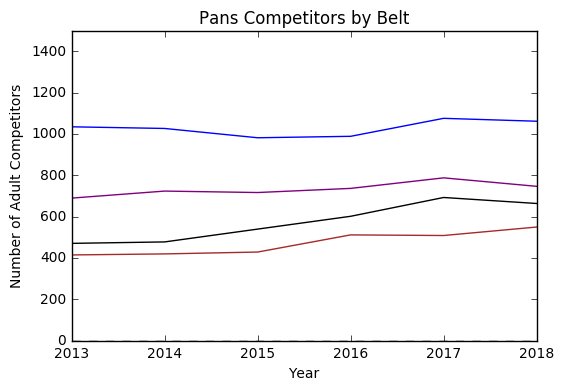

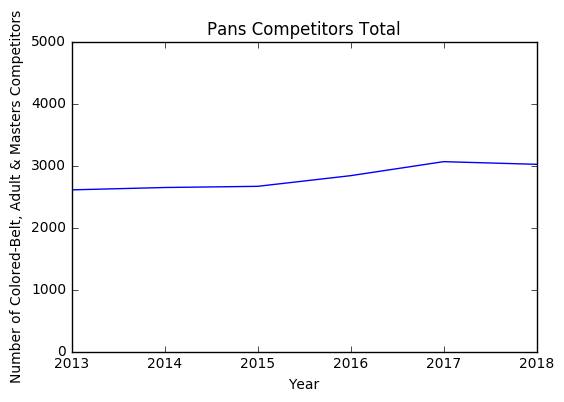

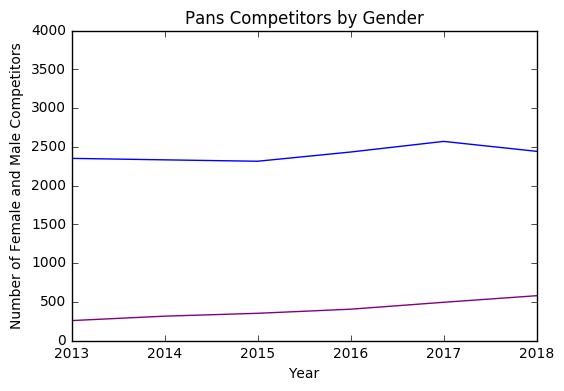

In [10]:
labels = ["2013","2014","2015","2016","2017","2018"]

plt.clf()
plt.title("Pans Competitors by Belt")
plt.plot(years, pans_white, c="black", linestyle="dashed")
plt.plot(years, pans_blue, c="blue")
plt.plot(years, pans_purple, c="purple")
plt.plot(years, pans_brown, c="brown")
plt.plot(years, pans_black, c="black")
plt.xlabel("Year")
plt.ylabel("Number of Adult Competitors")
plt.ylim(0,1500)
plt.xticks(years, labels)
plt.show()

plt.clf()
plt.title("Pans Competitors Total")
plt.plot(years, pans_totals)
plt.xlabel("Year")
plt.xticks(years, labels)
plt.ylim(0,5000)
plt.ylabel("Number of Colored-Belt, Adult & Masters Competitors")
plt.show()

plt.clf()
plt.title("Pans Competitors by Gender")
plt.plot(years, pans_female, c="purple")
plt.plot(years, pans_male, c="blue")
plt.xlabel("Year")
plt.xticks(years, labels)
plt.ylim(0,4000)
plt.ylabel("Number of Female and Male Competitors")
plt.show()

In [12]:
euros = [154, 232, 352, 490, 652, 849]

euros_totals = [0]*len(euros)
euros_white = [0]*len(euros)
euros_blue = [0]*len(euros)
euros_purple = [0]*len(euros)
euros_brown = [0]*len(euros)
euros_black = [0]*len(euros)
euros_female = [0]*len(euros)
euros_male = [0]*len(euros)

years = [2013, 2014, 2015, 2016, 2017, 2018]

for i,comp in enumerate(euros):
    page = urllib2.urlopen("http://www.ibjjfdb.com/ChampionshipResults/%d/PublicRegistrations?lang=en-US"%comp)

    soup = BeautifulSoup(page,'html.parser')
    #Segregate data by rows
    rows = soup.findAll('div',{'class':'row'})

    #Create empty lists
    divisions = []
    competitors = []

    #Create and append respective lists with a loop
    for row in rows:
        raw_division = row.h4.text
        division = raw_division.split(' / ')
        divisions.append(division)

        raw_competitors = row.tfoot.tr.td.text.strip()
        competitor = raw_competitors.replace('Total: ','')
        competitors.append(competitor)
        
    competitors = map(int, competitors)
    belt_divisions = numpy.unique(numpy.transpose(divisions)[0])
    age_divisions = numpy.unique(numpy.transpose(divisions)[1])
    gender_divisions = numpy.unique(numpy.transpose(divisions)[2])
    weight_classes = numpy.unique(numpy.transpose(divisions)[3])
    
    exclude_absolute = numpy.where("Open Class" != numpy.transpose(divisions)[3])
    exclude_white = numpy.where("WHITE" != numpy.transpose(divisions)[0])
    exclude_juvenile1 = numpy.where("Juvenile 1" != numpy.transpose(divisions)[1])
    exclude_juvenile2 = numpy.where("Juvenile 2" != numpy.transpose(divisions)[1])
    exclude_juvenile = numpy.where("Juvenile" != numpy.transpose(divisions)[1])
    
    #Comment this out if you'd like to include absolute divisions
    #(but I think that commenting it out will make you double-count competitors)
    mask = exclude_absolute[0]
    
    #Comment this out if you'd like to include Juvenile 1
    mask = numpy.intersect1d(mask,exclude_juvenile1)
    
    #Comment this out if you'd like to include Juvenile 2
    mask = numpy.intersect1d(mask, exclude_juvenile2)
  
    #Comment this out if you'd like to include white belts
    mask = numpy.intersect1d(mask, exclude_white)
    
    only_women = numpy.intersect1d(mask, numpy.where("Female" == numpy.transpose(divisions)[2]))
    only_men = numpy.intersect1d(mask, numpy.where("Male" == numpy.transpose(divisions)[2]))
    
    only_white = numpy.intersect1d(mask, numpy.where("WHITE" == numpy.transpose(divisions)[0]))
    only_blue = numpy.intersect1d(mask, numpy.where("BLUE" == numpy.transpose(divisions)[0]))
    only_purple = numpy.intersect1d(mask, numpy.where("PURPLE" == numpy.transpose(divisions)[0]))
    only_brown = numpy.intersect1d(mask, numpy.where("BROWN" == numpy.transpose(divisions)[0]))
    only_black = numpy.intersect1d(mask, numpy.where("BLACK" == numpy.transpose(divisions)[0]))
    
    print i,
    
    for x in only_white:
        euros_white[i] += competitors[x]
    
    for x in only_blue:
        euros_blue[i] += competitors[x]
    
    for x in only_purple:
        euros_purple[i] += competitors[x]
        
    for x in only_brown:
        euros_brown[i] += competitors[x]
        
    for x in only_black:
        euros_black[i] += competitors[x]
    
    for x in mask:
        euros_totals[i] += competitors[x]
        
    for x in only_women:
        euros_female[i] += competitors[x]
        
    for x in only_men:
        euros_male[i] += competitors[x]

0 1 2 3 4 5


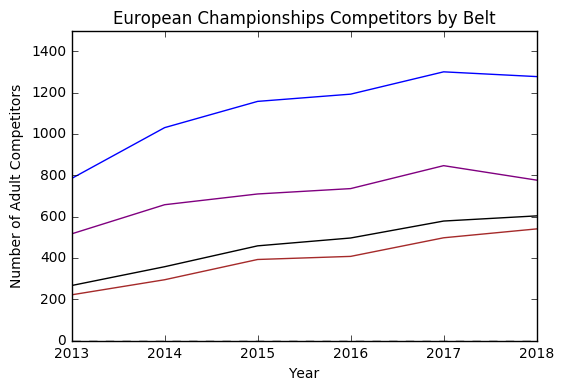

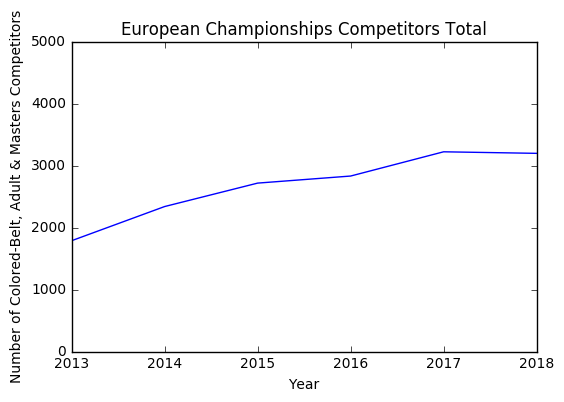

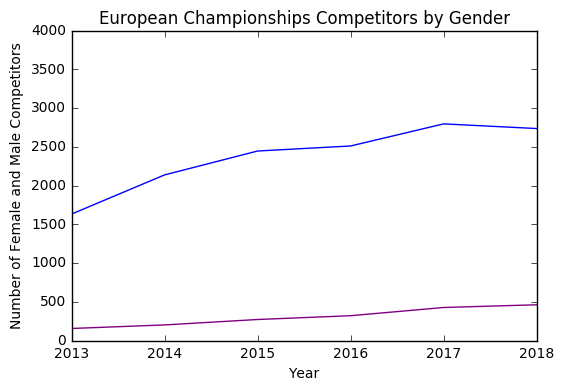

In [13]:
labels = ["2013","2014","2015","2016","2017","2018"]
years = [2013,2014,2015,2016,2017,2018]

plt.clf()
plt.title("European Championships Competitors by Belt")
plt.plot(years, euros_white, c="black", linestyle="dashed")
plt.plot(years, euros_blue, c="blue")
plt.plot(years, euros_purple, c="purple")
plt.plot(years, euros_brown, c="brown")
plt.plot(years, euros_black, c="black")
plt.xlabel("Year")
plt.ylabel("Number of Adult Competitors")
plt.ylim(0,1500)
plt.xticks(years, labels)
plt.show()

plt.clf()
plt.title("European Championships Competitors Total")
plt.plot(years, euros_totals)
plt.xlabel("Year")
plt.xticks(years, labels)
plt.ylim(0,5000)
plt.ylabel("Number of Colored-Belt, Adult & Masters Competitors")
plt.show()

plt.clf()
plt.title("European Championships Competitors by Gender")
plt.plot(years, euros_female, c="purple")
plt.plot(years, euros_male, c="blue")
plt.xlabel("Year")
plt.xticks(years, labels)
plt.ylim(0,4000)
plt.ylabel("Number of Female and Male Competitors")
plt.show()

In [14]:
brazil = [258, 380, 515, 712, 894]

brazil_totals = [0]*len(brazil)
brazil_white = [0]*len(brazil)
brazil_blue = [0]*len(brazil)
brazil_purple = [0]*len(brazil)
brazil_brown = [0]*len(brazil)
brazil_black = [0]*len(brazil)
brazil_female = [0]*len(brazil)
brazil_male = [0]*len(brazil)

years = [2014, 2015, 2016, 2017, 2018]

for i,comp in enumerate(brazil):
    page = urllib2.urlopen("http://www.ibjjfdb.com/ChampionshipResults/%d/PublicRegistrations?lang=en-US"%comp)

    soup = BeautifulSoup(page,'html.parser')
    #Segregate data by rows
    rows = soup.findAll('div',{'class':'row'})

    #Create empty lists
    divisions = []
    competitors = []

    #Create and append respective lists with a loop
    for row in rows:
        raw_division = row.h4.text
        division = raw_division.split(' / ')
        divisions.append(division)

        raw_competitors = row.tfoot.tr.td.text.strip()
        competitor = raw_competitors.replace('Total: ','')
        competitors.append(competitor)
        
    competitors = map(int, competitors)
    belt_divisions = numpy.unique(numpy.transpose(divisions)[0])
    age_divisions = numpy.unique(numpy.transpose(divisions)[1])
    gender_divisions = numpy.unique(numpy.transpose(divisions)[2])
    weight_classes = numpy.unique(numpy.transpose(divisions)[3])
    
    exclude_absolute = numpy.where("Open Class" != numpy.transpose(divisions)[3])
    exclude_white = numpy.where("WHITE" != numpy.transpose(divisions)[0])
    exclude_juvenile1 = numpy.where("Juvenile 1" != numpy.transpose(divisions)[1])
    exclude_juvenile2 = numpy.where("Juvenile 2" != numpy.transpose(divisions)[1])
    exclude_juvenile = numpy.where("Juvenile" != numpy.transpose(divisions)[1])
    
    #Comment this out if you'd like to include absolute divisions
    #(but I think that commenting it out will make you double-count competitors)
    mask = exclude_absolute[0]
    
    #Comment this out if you'd like to include Juvenile 1
    mask = numpy.intersect1d(mask,exclude_juvenile1)
    
    #Comment this out if you'd like to include Juvenile 2
    mask = numpy.intersect1d(mask, exclude_juvenile2)
  
    #Comment this out if you'd like to include white belts
    mask = numpy.intersect1d(mask, exclude_white)
    
    only_women = numpy.intersect1d(mask, numpy.where("Female" == numpy.transpose(divisions)[2]))
    only_men = numpy.intersect1d(mask, numpy.where("Male" == numpy.transpose(divisions)[2]))
    
    only_white = numpy.intersect1d(mask, numpy.where("WHITE" == numpy.transpose(divisions)[0]))
    only_blue = numpy.intersect1d(mask, numpy.where("BLUE" == numpy.transpose(divisions)[0]))
    only_purple = numpy.intersect1d(mask, numpy.where("PURPLE" == numpy.transpose(divisions)[0]))
    only_brown = numpy.intersect1d(mask, numpy.where("BROWN" == numpy.transpose(divisions)[0]))
    only_black = numpy.intersect1d(mask, numpy.where("BLACK" == numpy.transpose(divisions)[0]))
    
    print i,
    
    for x in only_white:
        brazil_white[i] += competitors[x]
    
    for x in only_blue:
        brazil_blue[i] += competitors[x]
    
    for x in only_purple:
        brazil_purple[i] += competitors[x]
        
    for x in only_brown:
        brazil_brown[i] += competitors[x]
        
    for x in only_black:
        brazil_black[i] += competitors[x]
    
    for x in mask:
        brazil_totals[i] += competitors[x]
        
    for x in only_women:
        brazil_female[i] += competitors[x]
        
    for x in only_men:
        brazil_male[i] += competitors[x]

0 1 2 3 4


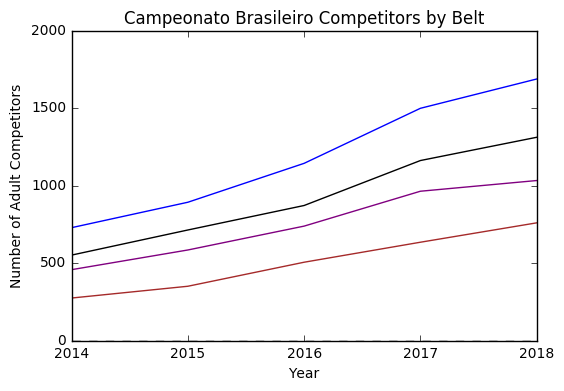

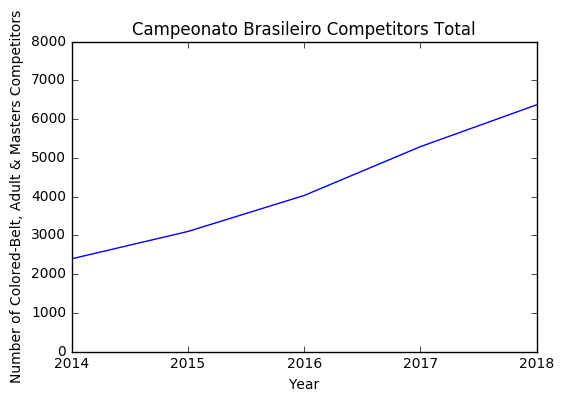

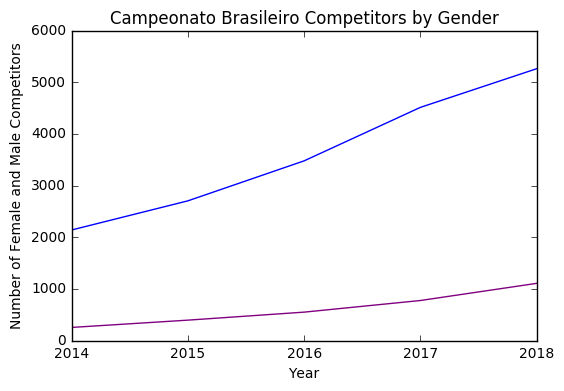

In [15]:
years = [2014, 2015, 2016, 2017, 2018]
labels = ["2014","2015","2016","2017","2018"]

plt.clf()
plt.title("Campeonato Brasileiro Competitors by Belt")
plt.plot(years, brazil_white, c="black", linestyle="dashed")
plt.plot(years, brazil_blue, c="blue")
plt.plot(years, brazil_purple, c="purple")
plt.plot(years, brazil_brown, c="brown")
plt.plot(years, brazil_black, c="black")
plt.xlabel("Year")
plt.ylabel("Number of Adult Competitors")
plt.ylim(0,2000)
plt.xticks(years, labels)
plt.show()

plt.clf()
plt.title("Campeonato Brasileiro Competitors Total")
plt.plot(years, brazil_totals)
plt.xlabel("Year")
plt.xticks(years, labels)
plt.ylim(0,8000)
plt.ylabel("Number of Colored-Belt, Adult & Masters Competitors")
plt.show()

plt.clf()
plt.title("Campeonato Brasileiro Competitors by Gender")
plt.plot(years, brazil_female, c="purple")
plt.plot(years, brazil_male, c="blue")
plt.xlabel("Year")
plt.xticks(years, labels)
plt.ylim(0,6000)
plt.ylabel("Number of Female and Male Competitors")
plt.show()